In [306]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [307]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [308]:
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign

skin-cancer-malignant-vs-benign.zip: Skipping, found more recently modified local copy (use --force to force download)


In [309]:
import zipfile
zip = zipfile.ZipFile("/content/skin-cancer-malignant-vs-benign.zip",'r')
zip.extractall("/content")
zip.close()

In [310]:
#Give dataset path
train_path = '/content/data/train'
test_path = '/content/test'

Working with 1440 images
Image examples: 
1232.jpg


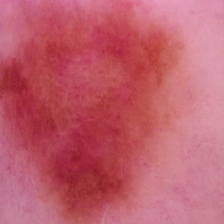

900.jpg


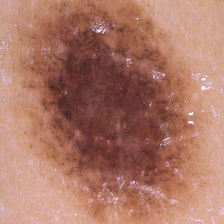

274.jpg


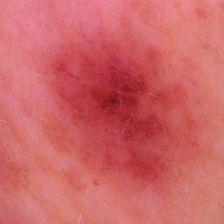

1553.jpg


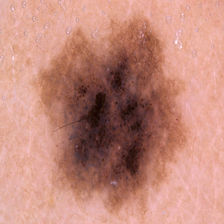

597.jpg


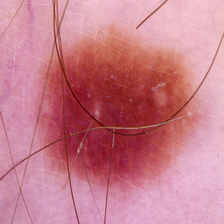

978.jpg


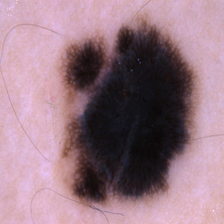

839.jpg


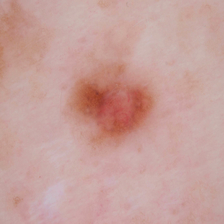

914.jpg


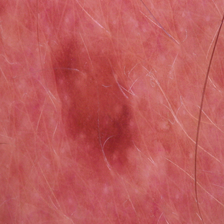

1005.jpg


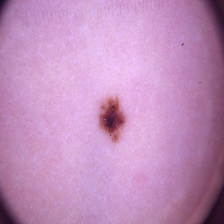

1767.jpg


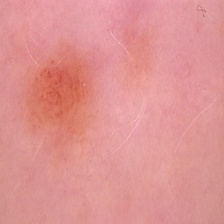

In [311]:
from PIL import Image
import os
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object


folder = train_path+'/benign'


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
# /content/data/train/benign/100.jpg --> example of os.path.join(folder,f). If the file exists.
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(10):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

In [312]:
vgg = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
#defining input with 3 dim as it is rgb image and vgg16 accepts 224*224 pixels

In [313]:
for layer in vgg.layers:
  layer.trainable = False
#layers will not get trained. Hence we will be using it for feature extraction

In [314]:
folders = glob('/content/train/*')
print(len(folders))
folders

2


['/content/train/malignant', '/content/train/benign']

In [315]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='sigmoid')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [316]:
from keras.utils.vis_utils import plot_model

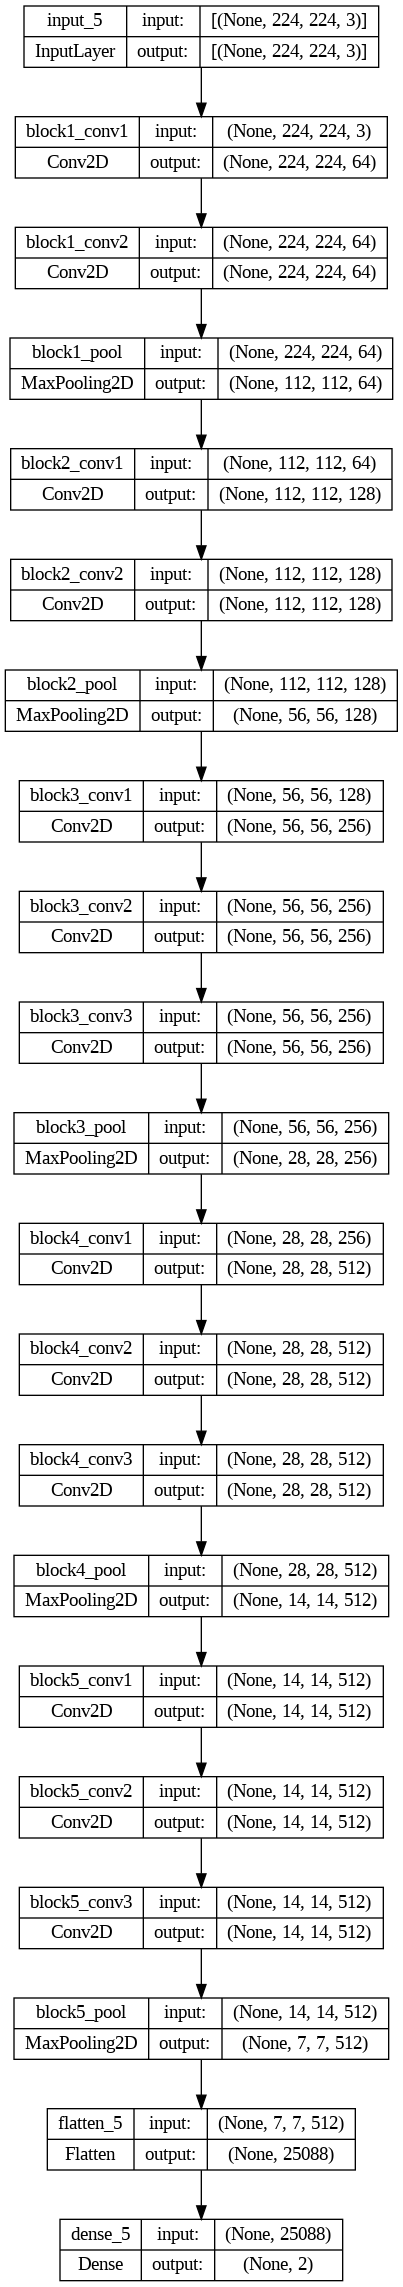

In [317]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [318]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [319]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [320]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2637 images belonging to 2 classes.


In [321]:
train_set.class_indices

{'benign': 0, 'malignant': 1}

In [322]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 660 images belonging to 2 classes.


In [323]:
model_history=model.fit(
  train_set,
  validation_data=test_set,
  epochs=3,

  verbose=True)

Epoch 1/3
83/83 [==============================] - 51s 598ms/step - loss: 1.8489 - accuracy: 0.7819 - val_loss: 3.0228 - val_accuracy: 0.7394
Epoch 2/3
83/83 [==============================] - 50s 600ms/step - loss: 1.8025 - accuracy: 0.8089 - val_loss: 1.7565 - val_accuracy: 0.8076
Epoch 3/3
83/83 [==============================] - 47s 568ms/step - loss: 1.7337 - accuracy: 0.8203 - val_loss: 1.5020 - val_accuracy: 0.8424


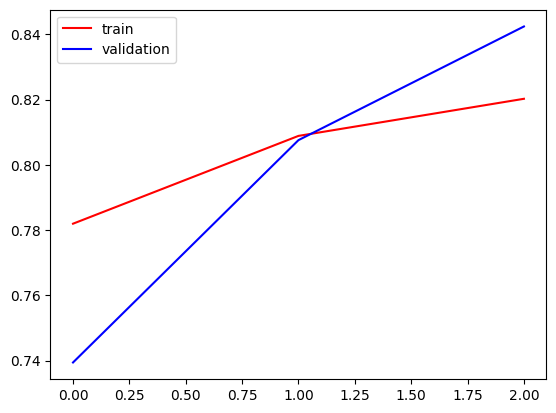

In [331]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'],color='red',label='train')
plt.plot(model_history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [371]:
import PIL

In [415]:
folder1 = list(glob('/content/train/benign/*'))
PIL.Image.open(str(folder1[1]))
folder1[0]


'/content/train/benign/1232.jpg'

(1, 224, 224, 3)


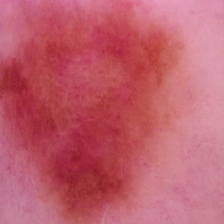

In [416]:

import cv2
image=cv2.imread(str(folder1[0]))
image_resized= cv2.resize(image, (224,224))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)
PIL.Image.open(str(folder1[0]))


In [417]:
pred=model.predict(image)


np.argmax(pred)

pred


1/1 [==============================] - 0s 21ms/step


array([[1.0000000e+00, 2.2939804e-14]], dtype=float32)

In [418]:
# np.argmax(r,axis=0)

In [419]:

pred=model.predict(image)
print(pred)
r=pred.flatten()
r


1/1 [==============================] - 0s 20ms/step
[[1.0000000e+00 2.2939804e-14]]


array([1.0000000e+00, 2.2939804e-14], dtype=float32)

In [420]:
rr=np.argmax(r,axis=0)
rr

0

In [421]:
if(rr==0) :
   print('benign')
else:
  print('malignant')

benign
